In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [3]:
data = pd.read_csv("../data/raw/turnover.csv")
data.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [4]:
X = data.drop(columns = ["event"])
y = data["event"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [6]:
cat_cols = X_train.select_dtypes(include = ["object"]).columns

In [7]:
num_cols = X_train.select_dtypes(include = ["int", "float"]).columns

In [8]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')

In [9]:
num_transformer = StandardScaler()

### Different preprocesser combinations

One Hot Encoding is a MUST

In [10]:
preprocessor1 = ColumnTransformer(
    transformers = [
        ('cat', cat_transformer, cat_cols)
    ]
)

One Hot Encoding + Scaling

In [11]:
preprocessor2 = ColumnTransformer(
    transformers = [
        ('cat', cat_transformer, cat_cols),
        ('num', num_transformer, num_cols)
    ]
)

## Model Experiments

### Preprocessor 1 + Baseline Logistic Regression

In [12]:
pipeline_log_reg1 = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('classifier', LogisticRegression())
])

In [13]:
pipeline_log_reg1.fit(X_train, y_train)
y_pred = pipeline_log_reg1.predict(X_test)
score = accuracy_score(y_test, y_pred)
report_log_reg1 = classification_report(y_test, y_pred, output_dict = True)
print(score)
print(report_log_reg1)

0.613941018766756
{'0': {'precision': 0.6111111111111112, 'recall': 0.5978260869565217, 'f1-score': 0.6043956043956044, 'support': 184.0}, '1': {'precision': 0.616580310880829, 'recall': 0.6296296296296297, 'f1-score': 0.6230366492146597, 'support': 189.0}, 'accuracy': 0.613941018766756, 'macro avg': {'precision': 0.6138457109959701, 'recall': 0.6137278582930756, 'f1-score': 0.6137161268051321, 'support': 373.0}, 'weighted avg': {'precision': 0.6138823678308877, 'recall': 0.613941018766756, 'f1-score': 0.6138410667838121, 'support': 373.0}}


### Preprocessor 2 + Baseline Logistic Regression

In [14]:
pipeline_log_reg2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('classifier', LogisticRegression())
])

In [15]:
pipeline_log_reg2.fit(X_train, y_train)
y_pred = pipeline_log_reg2.predict(X_test)
score = accuracy_score(y_test, y_pred)
report_log_reg2 = classification_report(y_test, y_pred, output_dict = True)
print(score)
print(report_log_reg2)

0.6005361930294906
{'0': {'precision': 0.5956284153005464, 'recall': 0.592391304347826, 'f1-score': 0.5940054495912807, 'support': 184.0}, '1': {'precision': 0.6052631578947368, 'recall': 0.6084656084656085, 'f1-score': 0.6068601583113457, 'support': 189.0}, 'accuracy': 0.6005361930294906, 'macro avg': {'precision': 0.6004457865976416, 'recall': 0.6004284564067173, 'f1-score': 0.6004328039513132, 'support': 373.0}, 'weighted avg': {'precision': 0.6005103626203909, 'recall': 0.6005361930294906, 'f1-score': 0.600518961516461, 'support': 373.0}}


### Preprocessor 1 + Baseline SVC

In [16]:
pipeline_svc1 = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('classifier', SVC())
])

In [17]:
pipeline_svc1.fit(X_train, y_train)
y_pred = pipeline_svc1.predict(X_test)
score = accuracy_score(y_test, y_pred)
report_svc1 = classification_report(y_test, y_pred, output_dict = True)
print(score)
print(report_svc1)

0.6300268096514745
{'0': {'precision': 0.6385542168674698, 'recall': 0.5760869565217391, 'f1-score': 0.6057142857142858, 'support': 184.0}, '1': {'precision': 0.6231884057971014, 'recall': 0.6825396825396826, 'f1-score': 0.6515151515151515, 'support': 189.0}, 'accuracy': 0.6300268096514745, 'macro avg': {'precision': 0.6308713113322857, 'recall': 0.6293133195307108, 'f1-score': 0.6286147186147186, 'support': 373.0}, 'weighted avg': {'precision': 0.6307683233224307, 'recall': 0.6300268096514745, 'f1-score': 0.6289216949270569, 'support': 373.0}}


### Preprocessor 2 + Baseline SVC

In [18]:
pipeline_svc2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('classifier', SVC())
])

In [19]:
pipeline_svc2.fit(X_train, y_train)
y_pred = pipeline_svc2.predict(X_test)
score = accuracy_score(y_test, y_pred)
report_svc2 = classification_report(y_test, y_pred, output_dict = True)
print(score)
print(report_svc2)

0.6514745308310992
{'0': {'precision': 0.6451612903225806, 'recall': 0.6521739130434783, 'f1-score': 0.6486486486486487, 'support': 184.0}, '1': {'precision': 0.6577540106951871, 'recall': 0.6507936507936508, 'f1-score': 0.6542553191489362, 'support': 189.0}, 'accuracy': 0.6514745308310992, 'macro avg': {'precision': 0.6514576505088838, 'recall': 0.6514837819185646, 'f1-score': 0.6514519838987924, 'support': 373.0}, 'weighted avg': {'precision': 0.6515420521199603, 'recall': 0.6514745308310992, 'f1-score': 0.6514895621193038, 'support': 373.0}}


### Preprocessor 1 + Baseline XGB Classifier

In [20]:
pipeline_xgb1 = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('classifier', XGBClassifier())
])

In [21]:
pipeline_xgb1.fit(X_train, y_train)
y_pred = pipeline_xgb1.predict(X_test)
score = accuracy_score(y_test, y_pred)
report_xgb1 = classification_report(y_test, y_pred, output_dict = True)
print(score)
print(report_xgb1)

0.6005361930294906
{'0': {'precision': 0.5956284153005464, 'recall': 0.592391304347826, 'f1-score': 0.5940054495912807, 'support': 184.0}, '1': {'precision': 0.6052631578947368, 'recall': 0.6084656084656085, 'f1-score': 0.6068601583113457, 'support': 189.0}, 'accuracy': 0.6005361930294906, 'macro avg': {'precision': 0.6004457865976416, 'recall': 0.6004284564067173, 'f1-score': 0.6004328039513132, 'support': 373.0}, 'weighted avg': {'precision': 0.6005103626203909, 'recall': 0.6005361930294906, 'f1-score': 0.600518961516461, 'support': 373.0}}


### Preprocessor 2 + Baseline XGB Classifier

In [22]:
pipeline_xgb2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('classifier', XGBClassifier())
])

In [23]:
pipeline_xgb2.fit(X_train, y_train)
y_pred = pipeline_xgb2.predict(X_test)
score = accuracy_score(y_test, y_pred)
report_xgb2 = classification_report(y_test, y_pred, output_dict = True)
print(score)
print(report_xgb2)

0.6675603217158177
{'0': {'precision': 0.65625, 'recall': 0.6847826086956522, 'f1-score': 0.6702127659574468, 'support': 184.0}, '1': {'precision': 0.6795580110497238, 'recall': 0.6507936507936508, 'f1-score': 0.6648648648648648, 'support': 189.0}, 'accuracy': 0.6675603217158177, 'macro avg': {'precision': 0.667904005524862, 'recall': 0.6677881297446515, 'f1-score': 0.6675388154111559, 'support': 373.0}, 'weighted avg': {'precision': 0.6680602254380638, 'recall': 0.6675603217158177, 'f1-score': 0.6675029715700528, 'support': 373.0}}


### Preprocessor 1 + Baseline Random Forest Classifier

In [24]:
pipeline_rfc1 = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('classifier', RandomForestClassifier(random_state = 19))
])

In [25]:
pipeline_rfc1.fit(X_train, y_train)
y_pred = pipeline_rfc1.predict(X_test)
score = accuracy_score(y_test, y_pred)
report_rfc1 = classification_report(y_test, y_pred, output_dict = True)
print(score)
print(report_rfc1)

0.6407506702412868
{'0': {'precision': 0.6404494382022472, 'recall': 0.6195652173913043, 'f1-score': 0.6298342541436464, 'support': 184.0}, '1': {'precision': 0.6410256410256411, 'recall': 0.6613756613756614, 'f1-score': 0.6510416666666666, 'support': 189.0}, 'accuracy': 0.6407506702412868, 'macro avg': {'precision': 0.6407375396139441, 'recall': 0.6404704393834828, 'f1-score': 0.6404379604051564, 'support': 373.0}, 'weighted avg': {'precision': 0.6407414015631626, 'recall': 0.6407506702412868, 'f1-score': 0.6405801012397612, 'support': 373.0}}


### Preprocessor 2 + Baseline Random Forest Classifier

In [26]:
pipeline_rfc2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('classifier', RandomForestClassifier(random_state = 19))
])

In [27]:
pipeline_rfc2.fit(X_train, y_train)
y_pred = pipeline_rfc2.predict(X_test)
score = accuracy_score(y_test, y_pred)
report_rfc2 = classification_report(y_test, y_pred, output_dict = True)
print(score)
print(report_rfc2)

0.6916890080428955
{'0': {'precision': 0.6844919786096256, 'recall': 0.6956521739130435, 'f1-score': 0.6900269541778976, 'support': 184.0}, '1': {'precision': 0.6989247311827957, 'recall': 0.6878306878306878, 'f1-score': 0.6933333333333334, 'support': 189.0}, 'accuracy': 0.6916890080428955, 'macro avg': {'precision': 0.6917083548962106, 'recall': 0.6917414308718657, 'f1-score': 0.6916801437556155, 'support': 373.0}, 'weighted avg': {'precision': 0.6918050891627868, 'recall': 0.6916890080428955, 'f1-score': 0.6917023044738154, 'support': 373.0}}


### Preprocessor 1 + Bagging Classifier (RFC)

In [28]:
pipeline_bagging1 = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('classifier', BaggingClassifier(RandomForestClassifier(random_state = 19)))
])

In [29]:
pipeline_bagging1.fit(X_train, y_train)
y_pred = pipeline_bagging1.predict(X_test)
score = accuracy_score(y_test, y_pred)
report_bagging1 = classification_report(y_test, y_pred, output_dict = True)
print(score)
print(report_bagging1)

0.6621983914209115
{'0': {'precision': 0.6593406593406593, 'recall': 0.6521739130434783, 'f1-score': 0.6557377049180327, 'support': 184.0}, '1': {'precision': 0.6649214659685864, 'recall': 0.671957671957672, 'f1-score': 0.6684210526315789, 'support': 189.0}, 'accuracy': 0.6621983914209115, 'macro avg': {'precision': 0.6621310626546228, 'recall': 0.6620657925005751, 'f1-score': 0.6620793787748058, 'support': 373.0}, 'weighted avg': {'precision': 0.6621684675247832, 'recall': 0.6621983914209115, 'f1-score': 0.6621643878077385, 'support': 373.0}}


### Preprocessor 2 + Bagging Classifier (RFC)

In [30]:
pipeline_bagging2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('classifier', BaggingClassifier(RandomForestClassifier(random_state = 19)))
])

In [31]:
pipeline_bagging2.fit(X_train, y_train)
y_pred = pipeline_bagging2.predict(X_test)
score = accuracy_score(y_test, y_pred)
report_bagging2 = classification_report(y_test, y_pred, output_dict = True)
print(score)
print(report_bagging2)

0.67828418230563
{'0': {'precision': 0.6758241758241759, 'recall': 0.6684782608695652, 'f1-score': 0.6721311475409836, 'support': 184.0}, '1': {'precision': 0.680628272251309, 'recall': 0.6878306878306878, 'f1-score': 0.6842105263157895, 'support': 189.0}, 'accuracy': 0.67828418230563, 'macro avg': {'precision': 0.6782262240377424, 'recall': 0.6781544743501264, 'f1-score': 0.6781708369283865, 'support': 373.0}, 'weighted avg': {'precision': 0.6782584230754579, 'recall': 0.67828418230563, 'f1-score': 0.678251797912132, 'support': 373.0}}


### Preprocessor 1 + AdaBoost Classifier (RFC)

In [32]:
pipeline_adaboost1 = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('classifier', AdaBoostClassifier(RandomForestClassifier(random_state = 19)))
])

In [33]:
pipeline_adaboost1.fit(X_train, y_train)
y_pred = pipeline_adaboost1.predict(X_test)
score = accuracy_score(y_test, y_pred)
report_adaboost1 = classification_report(y_test, y_pred, output_dict = True)
print(score)
print(report_adaboost1)

0.646112600536193
{'0': {'precision': 0.6413043478260869, 'recall': 0.6413043478260869, 'f1-score': 0.6413043478260869, 'support': 184.0}, '1': {'precision': 0.6507936507936508, 'recall': 0.6507936507936508, 'f1-score': 0.6507936507936508, 'support': 189.0}, 'accuracy': 0.646112600536193, 'macro avg': {'precision': 0.6460489993098688, 'recall': 0.6460489993098688, 'f1-score': 0.6460489993098688, 'support': 373.0}, 'weighted avg': {'precision': 0.646112600536193, 'recall': 0.646112600536193, 'f1-score': 0.646112600536193, 'support': 373.0}}


### Preprocessor 2 + AdaBoost Classifier (RFC)

In [34]:
pipeline_adaboost2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('classifier', AdaBoostClassifier(RandomForestClassifier(random_state = 19)))
])

In [35]:
pipeline_adaboost2.fit(X_train, y_train)
y_pred = pipeline_adaboost2.predict(X_test)
score = accuracy_score(y_test, y_pred)
report_adaboost2 = classification_report(y_test, y_pred, output_dict = True)
print(score)
print(report_adaboost2)

0.6890080428954424
{'0': {'precision': 0.6847826086956522, 'recall': 0.6847826086956522, 'f1-score': 0.6847826086956522, 'support': 184.0}, '1': {'precision': 0.6931216931216931, 'recall': 0.6931216931216931, 'f1-score': 0.6931216931216931, 'support': 189.0}, 'accuracy': 0.6890080428954424, 'macro avg': {'precision': 0.6889521509086727, 'recall': 0.6889521509086727, 'f1-score': 0.6889521509086727, 'support': 373.0}, 'weighted avg': {'precision': 0.6890080428954424, 'recall': 0.6890080428954424, 'f1-score': 0.6890080428954424, 'support': 373.0}}


## Results of this first round of experiments

For this particular business problem we want to build a model that minimizes False Negatives

False Negative (FN) = The model predicts the employee will stay, but they actually leave.  
False Positives (FP) = The model predicts the employee will leave, but they actually stay.  

Why is FN worse than FP?  
If you fail to predict an employee leaving (FN case), the company misses the opportunity to take proactive measures (e.g., retention strategies).

So our focus will be on the following model metrics:  
1. Recall of the Positive Class
* Measures how well the model captures actual leavers.
* Formula: TP / (TP + FN)
* Higher Recall = Fewer False Negatives ✅
2. F1 - Score (macro avg)
* Balances precision and recall.  
* Useful if both FN and FP have costs, but FN is worse.
3. Accuracy
* As a general metric of the model.

Since there is no class imbalance in this dataset, ROC-AUC will not be used as a metric.

In [36]:
experiment_reports = [report_log_reg1, report_log_reg2, report_svc1, report_svc2, report_xgb1, report_xgb2, 
                      report_rfc1, report_rfc2, report_bagging1, report_bagging2, report_adaboost1, report_adaboost2]
experiment_name = ["P1 + LogReg", "P2 + LogReg", "P1 + SVC", "P2 + SVC", "P1 + XGB", "P2 + XGB", "P1 + RFC", "P2 + RFC", 
                   "P1 + Bagg", "P2 + Bagg", "P1 + AdaB", "P2 + AdaB"]

In [37]:
results_dict = {}

In [38]:
for index, report in enumerate(experiment_reports):
    results_dict[experiment_name[index]] = {
        "recall": report["1"]["recall"],
        "f1_score": report["macro avg"]["f1-score"],
        "accuracy": report["accuracy"]
    }
print(results_dict)

{'P1 + LogReg': {'recall': 0.6296296296296297, 'f1_score': 0.6137161268051321, 'accuracy': 0.613941018766756}, 'P2 + LogReg': {'recall': 0.6084656084656085, 'f1_score': 0.6004328039513132, 'accuracy': 0.6005361930294906}, 'P1 + SVC': {'recall': 0.6825396825396826, 'f1_score': 0.6286147186147186, 'accuracy': 0.6300268096514745}, 'P2 + SVC': {'recall': 0.6507936507936508, 'f1_score': 0.6514519838987924, 'accuracy': 0.6514745308310992}, 'P1 + XGB': {'recall': 0.6084656084656085, 'f1_score': 0.6004328039513132, 'accuracy': 0.6005361930294906}, 'P2 + XGB': {'recall': 0.6507936507936508, 'f1_score': 0.6675388154111559, 'accuracy': 0.6675603217158177}, 'P1 + RFC': {'recall': 0.6613756613756614, 'f1_score': 0.6404379604051564, 'accuracy': 0.6407506702412868}, 'P2 + RFC': {'recall': 0.6878306878306878, 'f1_score': 0.6916801437556155, 'accuracy': 0.6916890080428955}, 'P1 + Bagg': {'recall': 0.671957671957672, 'f1_score': 0.6620793787748058, 'accuracy': 0.6621983914209115}, 'P2 + Bagg': {'recall'

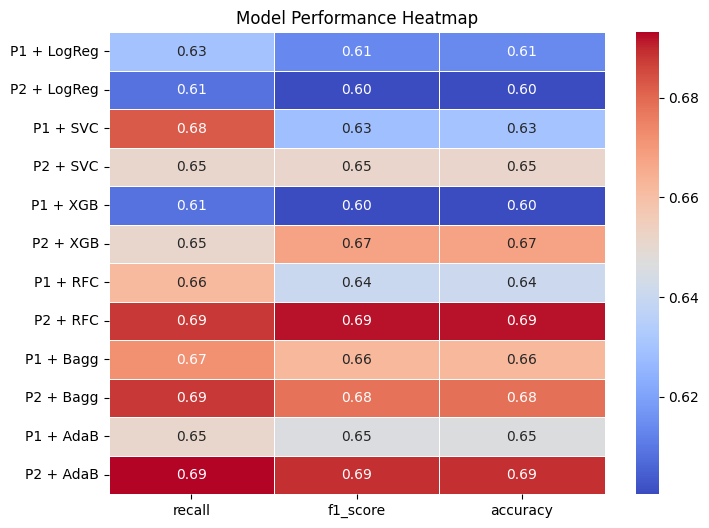

In [39]:
df = pd.DataFrame(results_dict).T

plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Model Performance Heatmap")

plt.show()

### Test "P2 + Bagg" using Tree as Estimator to reduce redundancy

In [40]:
pipeline_bagging2_tree = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('classifier', BaggingClassifier(DecisionTreeClassifier(random_state = 19)))
])

In [41]:
pipeline_bagging2_tree.fit(X_train, y_train)
y_pred = pipeline_bagging2_tree.predict(X_test)
score = accuracy_score(y_test, y_pred)
report_bagging2_tree = classification_report(y_test, y_pred, output_dict = True)
print(score)
print(report_bagging2_tree)

0.6193029490616622
{'0': {'precision': 0.5905172413793104, 'recall': 0.7445652173913043, 'f1-score': 0.6586538461538461, 'support': 184.0}, '1': {'precision': 0.6666666666666666, 'recall': 0.4973544973544973, 'f1-score': 0.5696969696969697, 'support': 189.0}, 'accuracy': 0.6193029490616622, 'macro avg': {'precision': 0.6285919540229885, 'recall': 0.6209598573729008, 'f1-score': 0.6141754079254079, 'support': 373.0}, 'weighted avg': {'precision': 0.6291023389109734, 'recall': 0.6193029490616622, 'f1-score': 0.61357918221189, 'support': 373.0}}


### Perform Cross Validation to evaluate overfitting for "P2 + Bagg" model

In [42]:
cv_scores = cross_val_score(pipeline_bagging2, X_train, y_train, cv=5, scoring='recall')

print(f'Cross-Validation Recall Scores: {cv_scores}')
print(f'Mean Recall: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

Cross-Validation Recall Scores: [0.64935065 0.64473684 0.68421053 0.73684211 0.74025974]
Mean Recall: 0.6911 ± 0.0411


### Hyperparameter Tuning for "P2 + Bagg" model

In [43]:
rfc = RandomForestClassifier(random_state = 19, n_jobs = -1)

bagging = BaggingClassifier(estimator = rfc, random_state = 19, n_jobs = -1)

pipeline = Pipeline([
    ("preprocessor", preprocessor2),
    ("model", bagging)
])

param_grid = {
    "model__n_estimators": [10, 50, 100],  # Bagging n_estimators
    "model__max_samples": [0.7, 1.0],      # Percentage of samples used
    "model__max_features": [0.7, 1.0],     # Percentage of features used
    "model__estimator__n_estimators": [50, 100],  # RFC trees
    "model__estimator__max_depth": [5, 10, None],  # Max tree depth
    "model__estimator__min_samples_split": [2, 5], # Min samples to split
}

In [44]:
random_search = RandomizedSearchCV(pipeline, param_grid, scoring="recall", cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               Index(['gender', 'industry', 'profession', 'traffic', 'coach', 'head_gender',
       'greywage', 'way'],
      dtype='object')),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                               Index(['stag', 'age', 'extraversion', 'independ', 'selfcontrol', 'anxiety',
       'nova...
                                              BaggingClassifier(estimator=RandomForestClassifier(n_jobs=-1,
                                                                                                 random_state=19),
                                                                n_jobs=-1,
                                                                random_state=19))]),
                   n_jobs=-1,
                   param_distributions={'model__estimator__max_depth': [5, 10,
                                                                        None],
                                        'model__estimator__min_samples_split': [2,
                                                                                5],
                                        'model__estimator__n_estimators': [50,
                                                                           100],
                                        'model__max_features': [0.7, 1.0],
                                        'model__max_samples': [0.7, 1.0],
                                        'model__n_estimators': [10, 50, 100]},
                   scoring='recall', verbose=2)

In [45]:
# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best Model
best_model = random_search.best_estimator_

Best Parameters: {'model__n_estimators': 50, 'model__max_samples': 1.0, 'model__max_features': 0.7, 'model__estimator__n_estimators': 50, 'model__estimator__min_samples_split': 2, 'model__estimator__max_depth': 10}


In [46]:
y_pred = best_model.predict(X_test)
best_model_report = classification_report(y_test, y_pred, output_dict = True)
print(best_model_report["1"]["recall"])
print(best_model_report["macro avg"]["f1-score"])
print(best_model_report["accuracy"])

0.7037037037037037
0.6585357063050985
0.6595174262734584


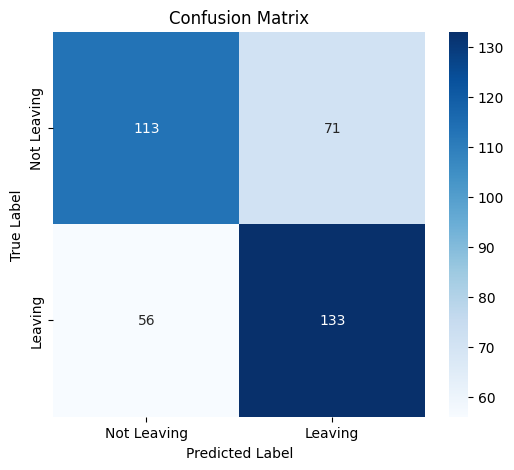

In [52]:
best_model_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(best_model_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Leaving", "Leaving"], yticklabels=["Not Leaving", "Leaving"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Saving the selected model

In [60]:
os.makedirs("../models", exist_ok=True)

In [61]:
joblib.dump(best_model, "../models/p2_bagg_hyp.pkl")
joblib.dump(preprocessor2, "../models/prep2.pkl")

['../models/prep2.pkl']

### Saving train and test data

In [ ]:
X_train.to_csv("../data/final/X_train.csv", index = False)
y_train.to_csv("../data/final/y_train.csv", index = False)
X_test.to_csv("../data/final/X_test.csv", index = False)
y_test.to_csv("../data/final/y_test.csv", index = False)

In [65]:
X.to_csv("../data/final/X.csv", index = False)
y.to_csv("../data/final/y.csv", index = False)